<h1>Battle of the Neighborhoods</h1>

<strong>Install Dependencies</strong>

In [79]:
!pip install folium
!pip install bs4
!pip install geopy
import folium
import pandas as pd
import numpy as np
import os
import json, requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from functools import partial
import matplotlib.pyplot as plt

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: 

<strong>Parse Paris wikipedia neighbourhoods data page</strong>

In [2]:
url = 'https://en.wikipedia.org/wiki/Arrondissements_of_Paris'
parse = requests.get(url).text
soup = BeautifulSoup(parse, 'html.parser')

In [3]:
table = soup.find('table', {'class':'wikitable sortable'})

In [4]:
tab = []
for row in table.findAll('tr'):
    cell = {}
    col = 0
    for row2 in row.findAll('td'):
        if col == 0:
            cell['Arrondisement'] = (str(row2.a.text).split('(')[0] + ' Arrondisement')
        elif col == 1:
            cell['Name'] = row2.text
        elif col == 2:
            cell['Area'] = repr(row2.text).replace('\\xa0km2', 'km2').split(' ')[0].replace('\'', '')
        elif col == 3:
            cell['Population'] = row2.text
        else:
            pass
        col+=1
    if cell == {}:
        pass
    else:
        tab.append(cell)

In [5]:
paris_df = pd.DataFrame(tab)
for i in range(len(paris_df)):
    if paris_df['Area'].iloc[i] == 'before':
        paris_df['Area'].iloc[i] = paris_df['Area'].iloc[i-1]
    if type(paris_df['Population'].iloc[i]) == float:
        paris_df['Population'].iloc[i] = paris_df['Population'].iloc[i-1]


In [6]:
paris_df

,Arrondisement,Name,Area,Population
0,1st Arrondisement,Louvre,5.59km2,"100,196"
1,2nd Arrondisement,Bourse,5.59km2,"100,196"
2,3rd Arrondisement,Temple,5.59km2,"100,196"
3,4th Arrondisement,Hôtel-de-Ville,5.59km2,"100,196"
4,5th Arrondisement,Panthéon,2.541km2,"59,631"
5,6th Arrondisement,Luxembourg,2.154km2,"41,976"
6,7th Arrondisement,Palais-Bourbon,4.088km2,"52,193"
7,8th Arrondisement,Élysée,3.881km2,"37,368"
8,9th Arrondisement,Opéra,2.179km2,"60,071"
9,10th Arrondisement,Entrepôt,2.892km2,"90,836"


<strong>Parse New York wikipedia neighbourhoods data page</strong>

In [7]:
url = 'https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City'
parse = requests.get(url).text
soup = BeautifulSoup(parse, 'html.parser')

In [8]:
table = soup.find('table', {'class':'wikitable sortable'})

In [9]:
tab = []
for row in table.findAll('tr'):
    cell = {}
    col = 0
    for row2 in row.findAll('td'):
        if col == 0:
            cell['Community Board'] = repr(row2.text).replace('\\', ' ').replace('xa0', '').strip('\'')
        elif col == 1:
            cell['Area'] = row2.text
        elif col == 2:
            cell['Population'] = row2.text
        elif col == 4:
            cell['Name'] = repr(row2.text).replace('\\n', '').strip('\'').strip('"')
        else:
            pass
        col+=1
    if cell == {}:
        pass
    else:
        tab.append(cell)

In [10]:
newyork_df = pd.DataFrame(tab)

In [11]:
newyork_df = newyork_df.drop(labels=len(newyork_df)-1, axis = 0)

In [12]:
newyork_df

,Community Board,Area,Population,Name
0,Bronx CB 1,7.17,"91,497","Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,"52,246","Hunts Point, Longwood"
2,Bronx CB 3,4.07,"79,762","Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,"146,441","Concourse, Highbridge"
4,Bronx CB 5,3.55,"128,200","Fordham, Morris Heights, Mount Hope, Universit..."
5,Bronx CB 6,4.01,"83,268","Bathgate, Belmont, East Tremont, West Farms"
6,Bronx CB 7,4.84,"139,286","Bedford Park, Norwood, University Heights"
7,Bronx CB 8,8.83,"101,731","Fieldston, Kingsbridge, Kingsbridge Heights, M..."
8,Bronx CB 9,12.41,"172,298","Bronx River, Bruckner, Castle Hill, Clason Poi..."
9,Bronx CB 10,16.76,"120,392","City Island, Co-op City, Locust Point, Pelham ..."


In [13]:
newyork_df = (newyork_df.set_index(['Community Board', 'Area', 'Population'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())                

<strong>Collect Location data for each neighborhood using Nominatim</strong>

In [15]:
paris_df['Latitude'] = ''
paris_df['Longitude'] = ''

In [16]:
for i in range(len(paris_df)):
    geolocator = Nominatim(user_agent="NightlifeApp")
    geocode = partial(geolocator.geocode, language="es")
    location = geocode(paris_df['Name'].iloc[i])
    paris_df['Latitude'].iloc[i] = location.latitude
    paris_df['Longitude'].iloc[i] = location.longitude

In [17]:
newyork_df['Latitude'] = ''
newyork_df['Longitude'] = ''

In [18]:
for i in range(len(newyork_df)):
    geolocator = Nominatim(user_agent="NightlifeApp")
    geocode = partial(geolocator.geocode, language="es")
    location = geocode(newyork_df['Name'].iloc[i])
    try:
        newyork_df['Latitude'].iloc[i] = location.latitude
        newyork_df['Longitude'].iloc[i] = location.longitude
    except:
        newyork_df['Latitude'].iloc[i] = 'Null'
        newyork_df['Longitude'].iloc[i] = 'Null'
        
newyork_df = newyork_df[newyork_df['Latitude'] != 'Null']
newyork_df = newyork_df[newyork_df['Longitude'] != 'Null']

In [19]:
newyork_df

,Community Board,Area,Population,Name,Latitude,Longitude
0,Bronx CB 1,7.17,"91,497",Melrose,42.4564,-71.0642
1,Bronx CB 1,7.17,"91,497",Mott Haven,40.809,-73.9229
2,Bronx CB 1,7.17,"91,497",Port Morris,40.9051,-74.6849
3,Bronx CB 2,5.54,"52,246",Hunts Point,47.6434,-122.23
4,Bronx CB 2,5.54,"52,246",Longwood,28.7008,-81.3466
...,...,...,...,...,...,...
325,Staten Island CB 3,58.97,"152,908",Prince's Bay,40.529,-74.1976
326,Staten Island CB 3,58.97,"152,908",Richmond Valley,-29.0268,152.987
327,Staten Island CB 3,58.97,"152,908",Rossville,39.1361,-95.9517
328,Staten Island CB 3,58.97,"152,908",Tottenville,40.5112,-74.2493


In [20]:
paris_df

,Arrondisement,Name,Area,Population,Latitude,Longitude
0,1st Arrondisement,Louvre,5.59km2,"100,196",48.8611,2.33803
1,2nd Arrondisement,Bourse,5.59km2,"100,196",48.8686,2.34147
2,3rd Arrondisement,Temple,5.59km2,"100,196",31.0982,-97.3428
3,4th Arrondisement,Hôtel-de-Ville,5.59km2,"100,196",43.9493,4.80526
4,5th Arrondisement,Panthéon,2.541km2,"59,631",41.8986,12.4768
5,6th Arrondisement,Luxembourg,2.154km2,"41,976",49.8159,6.12968
6,7th Arrondisement,Palais-Bourbon,4.088km2,"52,193",48.8616,2.31791
7,8th Arrondisement,Élysée,3.881km2,"37,368",4.75304,-54.045
8,9th Arrondisement,Opéra,2.179km2,"60,071",48.876,2.33996
9,10th Arrondisement,Entrepôt,2.892km2,"90,836",48.8761,2.35984


<strong>Connect to the Foursquare API using the below client id and secret</strong>

In [21]:
client_id='E3POCDH2JYSNHOUIFY0XRHSJUGPAW1ESFYFNJZ5D1X0E1EKK'
client_secret='OKGT2FOEV1U5TW0OYKLCV12BHUG2HKVPTNFPOJGCSLFUTHRK'

In [22]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


<strong>Create maps showing all the neighborhoods in Paris and New York</strong>

<strong>New York</strong>

In [23]:
# create map of New York using latitude and longitude values
#name - neighborhood, community - borough
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
try:
    for lat, lng, Community, Name in zip(newyork_df['Latitude'], newyork_df['Longitude'], newyork_df['Community Board'], newyork_df['Name']):
        label = '{}, {}'.format(Name, Community)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
except:
    pass
map_newyork

<strong>Paris</strong>

In [24]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [90]:
# create map of New York using latitude and longitude values
#name - neighborhood, community - borough
map_paris = folium.Map(location=[latitude, longitude], zoom_start=6)
# add markers to map
try:
    for lat, lng, Community, Name in zip(paris_df['Latitude'], paris_df['Longitude'], paris_df['Arrondisement'], paris_df['Name']):
        label = '{}, {}'.format(Name, Community)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_paris)  
except:
    pass
map_paris

<strong>Explore each of the neighborhoods using the Foursquare API</strong>

In [66]:
venues = []
url = 'https://api.foursquare.com/v2/venues/explore'
for i in range(len(paris_df)):
    params = dict(
    client_id=client_id,
    client_secret=client_secret,
    v='20180323',
    ll='{},{}'.format(paris_df['Latitude'].iloc[i],paris_df['Longitude'].iloc[i]),
    query='coffee',
    limit=100
    )
    resp = requests.get(url=url, params=params)
    venues.append(json.loads(resp.text))

In [67]:
paris_df['Venue_type'] = ''
paris_df['Venue_count'] = ''
paris_df['Pop_per_coffeeshop'] = ''
for i in range(len(venues)):
    paris_df['Venue_type'].iloc[i] = venues[i]['response']['query']
    paris_df['Venue_count'].iloc[i] = venues[i]['response']['totalResults']
    
    try:
        paris_df['Pop_per_coffeeshop'].iloc[i] = int(int(paris_df['Population'].iloc[i].replace(',', ''))/int(paris_df['Venue_count'].iloc[i]))
    except:
        paris_df['Pop_per_coffeeshop'].iloc[i] = 0

In [76]:
paris_df = paris_df.sort_values(by = ['Pop_per_coffeeshop'], ascending = False)
paris_df

,Arrondisement,Name,Area,Population,Latitude,Longitude,Venue_type,Venue_count,Pop_per_coffeeshop
11,12th Arrondisement,Reuilly,16.324km2,"141,287",49.0781,1.2238,coffee,4,35321
15,16th Arrondisement,Passy,16.305km2,"149,500",46.5413,4.53434,coffee,7,21357
3,4th Arrondisement,Hôtel-de-Ville,5.59km2,"100,196",43.9493,4.80526,coffee,10,10019
14,15th Arrondisement,Vaugirard,8.502km2,"235,178",48.8414,2.30038,coffee,37,6356
18,19th Arrondisement,Buttes-Chaumont,6.786km2,"188,066",48.8784,2.3812,coffee,31,6066
16,17th Arrondisement,Batignolles-Monceau,5.669km2,"168,737",48.8803,2.30859,coffee,28,6026
19,20th Arrondisement,Ménilmontant,5.984km2,"191,800",48.8667,2.38337,coffee,32,5993
2,3rd Arrondisement,Temple,5.59km2,"100,196",31.0982,-97.3428,coffee,17,5893
17,18th Arrondisement,Butte-Montmartre,6.005km2,"196,131",48.89,2.34647,coffee,36,5448
12,13th Arrondisement,Gobelins,7.146km2,"183,399",48.8324,2.35558,coffee,38,4826


In [69]:
venues = []
url = 'https://api.foursquare.com/v2/venues/explore'
for i in range(len(newyork_df)):
    params = dict(
    client_id=client_id,
    client_secret=client_secret,
    v='20180323',
    ll='{},{}'.format(newyork_df['Latitude'].iloc[i],newyork_df['Longitude'].iloc[i]),
    query='coffee',
    limit=100
    )
    resp = requests.get(url=url, params=params)
    venues.append(json.loads(resp.text))

In [70]:
newyork_df['Venue_type'] = ''
newyork_df['Venue_count'] = ''
newyork_df['Pop_per_coffeeshop'] = ''
for i in range(len(venues)):
    newyork_df['Venue_type'].iloc[i] = venues[i]['response']['query']
    newyork_df['Venue_count'].iloc[i] = venues[i]['response']['totalResults']
    try:
        newyork_df['Pop_per_coffeeshop'].iloc[i] = int(int(newyork_df['Population'].iloc[i].replace(',', ''))/int(newyork_df['Venue_count'].iloc[i]))
    except:
        newyork_df['Pop_per_coffeeshop'].iloc[i] = 0

In [87]:
newyork_df = newyork_df.sort_values(by = ['Pop_per_coffeeshop'], ascending = False)
newyork_df

,Community Board,Area,Population,Name,Latitude,Longitude,Venue_type,Venue_count,Pop_per_coffeeshop
305,Staten Island CB 2,54.62,"127,071",Grant City,40.4875,-94.4111,coffee,1,127071
102,Brooklyn CB 11,10.18,"172,129",Mapleton,42.1658,-95.7931,coffee,2,86064
41,Bronx CB 10,16.76,"120,392",Silver Beach,53.0397,-113.991,coffee,2,60196
295,Staten Island CB 1,36.62,"162,609",Tompkinsville,36.7023,-85.6916,coffee,3,54203
293,Staten Island CB 1,36.62,"162,609",Stapleton,33.2157,-82.4682,coffee,3,54203
...,...,...,...,...,...,...,...,...,...
159,Manhattan CB 5,4.25,"44,028",Midtown,40.7601,-73.9782,coffee,79,557
141,Manhattan CB 1,4.45,"34,420",Financial District,43.6487,-79.3815,coffee,102,337
204,Queens CB 3,7.33,"169,083",North Corona,-23.3904,16.1603,coffee,0,0
197,Queens CB 2,13.36,"109,920",Hunters Point,46.9989,-78.8003,coffee,0,0


<strong>Results and Visualization</strong>

<strong>Paris</strong>

<BarContainer object of 5 artists>

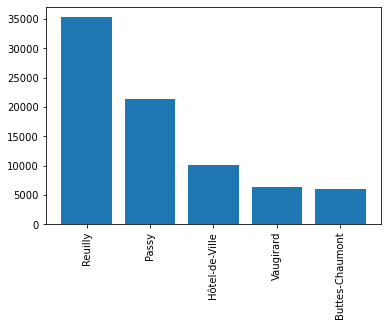

In [84]:
plt.xticks(rotation=90)
plt.bar(paris_df.head(5)['Name'],paris_df.head(5)['Pop_per_coffeeshop'] )

<strong>New York</strong>

<BarContainer object of 5 artists>

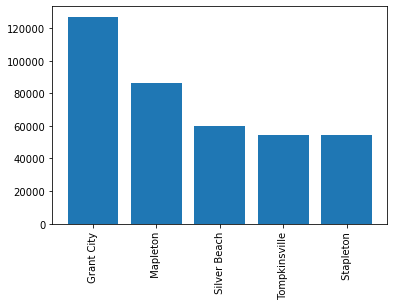

In [88]:
plt.xticks(rotation=90)
plt.bar(newyork_df.head(5)['Name'],newyork_df.head(5)['Pop_per_coffeeshop'] )